In [24]:
import MeCab
import pandas as pd
import re
from collections import Counter
import csv
import datetime

#wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 現在時刻生成
now = datetime.datetime.now()
d = now.strftime("%Y%m%d%H%M%S")


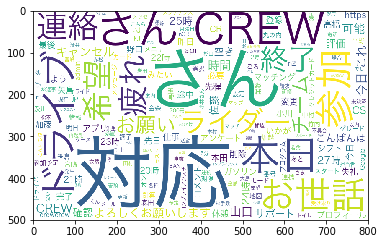

In [23]:
csv_file = 'data.csv'
data = str(pd.read_csv(csv_file,skiprows=[0,1],usecols=[1],header=None))

#形態素解析    
# パース
# mecab = MeCab.Tagger()
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
parse = mecab.parse(data)
lines = parse.split('\n')
items = (re.split('[\t,]', line) for line in lines)

#ワードクラウド用のテキスト格納
w = '' #ワードクラウド用の名詞を格納

# 名詞抽出
for item in items:
    # 名詞のみ抽出
#     if item[0] not in ('EOS', '', 't', 'ー') and item[1] == '名詞' and item[2] == '一般' :
    if item[0] not in ('EOS', '', 't', 'ー') and item[1] == '名詞' :
        #print(item[0])
        w += " " + item[0]

# ワードクラウド生成
wordcloud = WordCloud(background_color="white"
                      ,font_path="/System/Library/Fonts/ヒラギノ角ゴシック W3.ttc"
                      ,width=800
                      ,height=500).generate(w)

# 画像生成
plt.imshow(wordcloud)
plt.show()

In [21]:
csv_file = 'data.csv'
data = str(pd.read_csv(csv_file,skiprows=[0,1],usecols=[1],header=None))

#形態素解析  名詞バージョン
# パース
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
parse = mecab.parse(data)
lines = parse.split('\n')
items = (re.split('[\t,]', line) for line in lines)

# 名詞をリストに格納
cnt_words = [item[0]
         for item in items
         if (item[0] not in ('EOS', '', 't', 'ー') and
#              item[1] == '名詞')]
             item[1] == '名詞' and item[2] == '一般')]

print(cnt_words)
# CSVファイル生成   
output_name ="output.csv" #出力CSVの名前
write_fp=csv.writer(open(output_name, "w"))
write_fp.writerow(["更新日時",d]) #CSVに更新日時追加
write_fp.writerow(["名詞","count"]) #CSVに見出し追加

# 頻度順に出力
counter = Counter(cnt_words)
#print(counter)
for word, count in counter.most_common():
    write_fp.writerow([word,count]) #CSVに見出し追加
    print(f"{word}\t{count}")


['地図', 'メニュー', '疲れ', 'あと', '調子', 'クレジットカード', '情報', 'カード', '期限', '番号', 'メッセージ', 'モード', 'ドライバー', 'ライダー', 'グレード', 'ガソリン', '平', '業務', '😂', 'メンテナンス', '💂', '各種', '書類', '最後', 'ライダー', '辰', 'こんばんは', 'ラスト', '件', '別', 'ライダー', 'トイレ', '若葉', 'マップ', 'でし', 'ライド', '窓', '最後', '品', 'ケース', 'アンケート', 'チーム', 'アンケート', '疲れ', '先生', '会い', 'す', '赤松', 'お手数', 'コンプライアンスチ', 'ライダー', '受け取り', '金額', '空き', 'プロフィール', 'プロフィール', '文', '空き', '未決済', '疲れ', '空き', 'チーム', '枠', 'いただき', 'リクエスト', 'パン', '先', 'ライダー', '疲れ', '傘', 'チーム', '下記', '日程', '月', 'サポートチ', 'こんばんは', 'ガソリン', 'レシート', '写し', '数', 'どこか', 'い方', 'こんばんは', 'いおう', 'さんこん', '疲れ', 'CRE', '疲れ', '只今', 'チーム', '佐', 'クルー', 'チーム', 'rows', 'x', 'columns']
疲れ	6
ライダー	5
チーム	5
こんばんは	3
空き	3
ガソリン	2
最後	2
アンケート	2
プロフィール	2
地図	1
メニュー	1
あと	1
調子	1
クレジットカード	1
情報	1
カード	1
期限	1
番号	1
メッセージ	1
モード	1
ドライバー	1
グレード	1
平	1
業務	1
😂	1
メンテナンス	1
💂	1
各種	1
書類	1
辰	1
ラスト	1
件	1
別	1
トイレ	1
若葉	1
マップ	1
でし	1
ライド	1
窓	1
品	1
ケース	1
先生	1
会い	1
す	1
赤松	1
お手数	1
コンプライアンスチ	1
受け取り	1
金額	1
文	1
未決済	1
枠	1
いただき	1
リクエスト	1
パン	1
先	1
傘	1
下記	1
日程